# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Abdullah Fikri Handi Saputra
- **Email:** abdullahfikrihandi@gmail.com
- **ID Dicoding:** fikrihandy

## Menentukan Pertanyaan Bisnis

- Faktor Apa yang Mempengaruhi Jumlah Penyewaan Sepeda (Total `cnt`)?
- Bagaimana Pola Penyewaan Sepeda Berdasarkan Waktu dan Kondisi Cuaca?

## Import Semua Packages/Library yang Digunakan

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Data Wrangling

### Gathering Data

In [43]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [44]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Tidak ada missing values

### Cleaning Data

In [45]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berhasil mengonversi tipe data pada kolom `dteday` menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore: Summary of the Data
Struktur dataset

In [46]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [47]:
# Memeriksa jumlah nilai unik per kolom
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

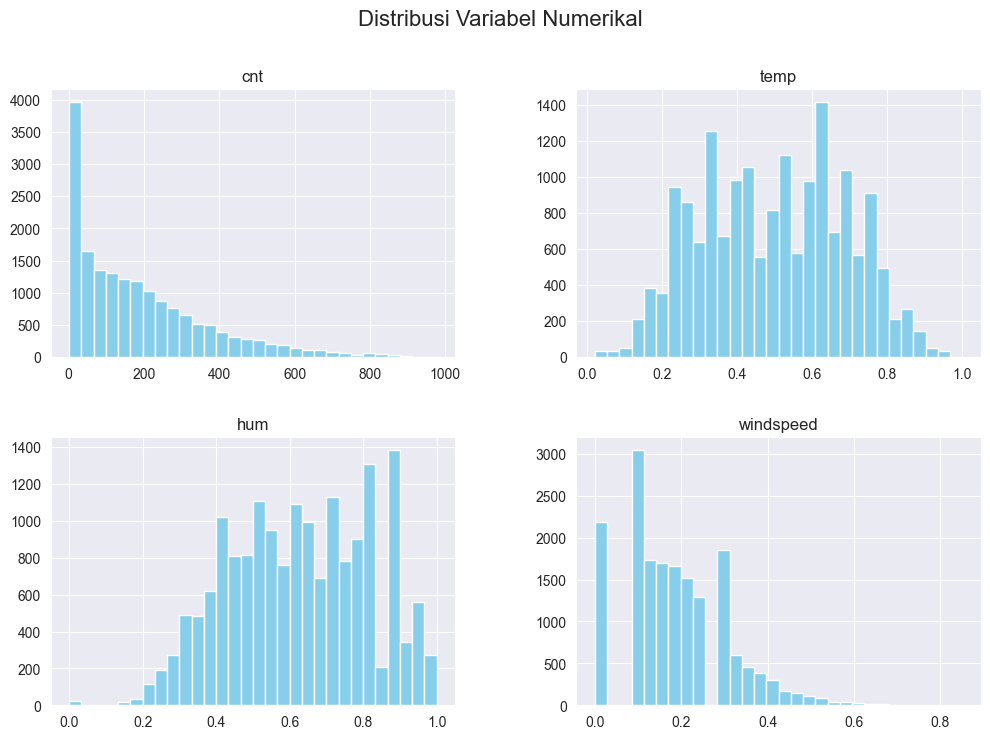

In [48]:
# Distribusi variabel numerikal
numerical_columns = ["cnt", "temp", "hum", "windspeed"]
hour_df[numerical_columns].hist(bins=30, figsize=(12, 8), color='skyblue')
plt.suptitle("Distribusi Variabel Numerikal", fontsize=16)
plt.show()

In [49]:
# Proporsi variabel kategorikal
categorical_columns = ["season", "weathersit", "workingday", "holiday"]
for col in categorical_columns:
    print(f"Distribusi {col}:")
    print(hour_df[col].value_counts(normalize=True) * 100)
    print("\n")

Distribusi season:
season
3    25.870303
2    25.369699
1    24.408769
4    24.351228
Name: proportion, dtype: float64


Distribusi weathersit:
weathersit
1    65.671212
2    26.146499
3     8.165027
4     0.017262
Name: proportion, dtype: float64


Distribusi workingday:
workingday
1    68.272052
0    31.727948
Name: proportion, dtype: float64


Distribusi holiday:
holiday
0    97.122964
1     2.877036
Name: proportion, dtype: float64




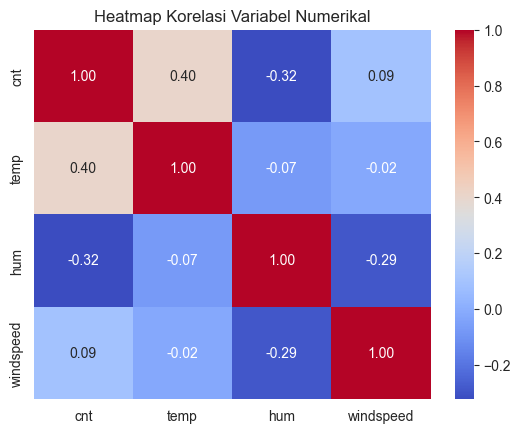

In [50]:
# Korelasi antar variabel numerikal
correlation_matrix = hour_df[["cnt", "temp", "hum", "windspeed"]].corr()

# Visualisasi korelasi
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerikal")
plt.show()

### Explore: Memproses Data (Pertanyaan 1)
Mengubah kolom kategoris menjadi variabel dummy.

In [51]:
df_q1 = hour_df.copy()
df_q1 = pd.get_dummies(df_q1, columns=["season", "weathersit", "weekday", "mnth", "hr"], drop_first=True)

X = df_q1.drop(columns=["cnt", "casual", "registered", "instant", "dteday"])
y = df_q1["cnt"]

### Explore: Split Dataset (Pertanyaan 1)
Membagi data menjadi set pelatihan dan pengujian.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Explore: Membangun Model (Pertanyaan 1)
Menggunakan Random Forest untuk memprediksi `cnt`.

In [53]:
# Model: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediksi
y_pred = rf.predict(X_test)

# Evaluasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 51.76


### Explore: Menentukan Faktor Paling Berpengaruh (Pertanyaan 1)

In [54]:
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Menampilkan 5 faktor yang berpengaruh
print(feature_importances.head(5))

       Feature  Importance
4        atemp    0.159248
2   workingday    0.097561
46       hr_17    0.093158
0           yr    0.080469
5          hum    0.078403


### Explore: Menghitung Rata-rata Jumlah Sharing Berdasarkan Jam dan Kondisi Cuaca (Pertanyaan 2)

In [55]:
df_q2 = hour_df.copy()
hourly_weather = df_q2.groupby(['hr', 'weathersit'])['cnt'].mean().reset_index()

### Explore: Membuat Label untuk Kondisi Cuaca (Pertanyaan 2)

In [56]:
weather_labels = {
    1: "Clear/Partly Cloudy",
    2: "Mist/Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}
hourly_weather['weathersit'] = hourly_weather['weathersit'].map(weather_labels)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

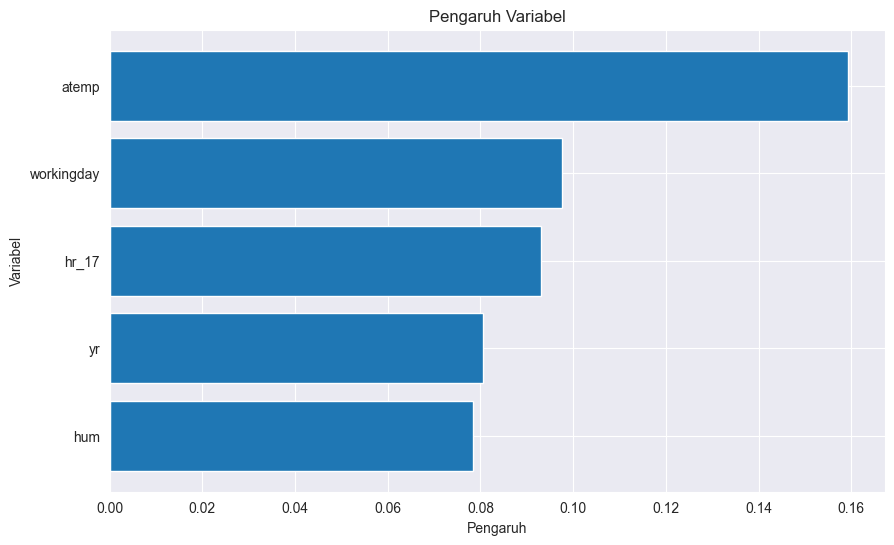

In [57]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.head(5)["Feature"], feature_importances.head(5)["Importance"])
plt.gca().invert_yaxis()
plt.title("Pengaruh Variabel")
plt.xlabel("Pengaruh")
plt.ylabel("Variabel")
plt.show()

Berikut penjelasan mengenai **5 faktor utama** yang paling memengaruhi jumlah penyewaan sepeda (`cnt`) berdasarkan analisis feature importance:

---

#### 1. **`atemp` (Feeling Temperature)**
   - **Deskripsi:** Suhu yang dirasakan, dinormalisasi dalam rentang tertentu (dibagi 50). Ini mencerminkan persepsi manusia terhadap suhu lingkungan, yang mungkin berbeda dari suhu aktual (`temp`).
   - **Dampak:**
     - Semakin nyaman suhu yang dirasakan (tidak terlalu panas atau dingin), semakin besar kemungkinan orang menggunakan sepeda.
     - Suhu yang terlalu rendah atau terlalu tinggi dapat mengurangi jumlah penyewaan.

---

#### 2. **`workingday`**
   - **Deskripsi:** Indikator apakah hari tersebut adalah hari kerja (1 untuk hari kerja, 0 untuk akhir pekan atau hari libur).
   - **Dampak:**
     - Hari kerja cenderung memiliki jumlah penyewaan yang tinggi karena pengguna sepeda sering menggunakannya untuk keperluan sehari-hari, seperti bekerja atau sekolah.
     - Sebaliknya, pada akhir pekan atau hari libur, jumlah penyewaan bisa lebih rendah atau lebih banyak tergantung pada aktivitas rekreasi.

---

#### 3. **`hr_17` (Jam 5 Sore)**
   - **Deskripsi:** Variabel dummy yang menunjukkan waktu tertentu, yaitu pukul 17:00 (jam pulang kerja).
   - **Dampak:**
     - Pukul 17:00 menjadi puncak penggunaan sepeda karena banyak orang pulang kerja pada waktu ini.
     - Waktu ini seringkali mencerminkan lonjakan penggunaan sepeda di kota-kota sibuk.

---

#### 4. **`yr` (Year)**
   - **Deskripsi:** Indikator tahun, dengan 0 untuk tahun 2011 dan 1 untuk tahun 2012.
   - **Dampak:**
     - Data menunjukkan adanya peningkatan jumlah penyewaan sepeda dari tahun 2011 ke tahun 2012, mungkin karena:
       - Pertumbuhan popularitas program berbagi sepeda.
       - Perubahan kondisi ekonomi atau kebijakan yang mendukung penggunaan sepeda.

---

#### 5. **`hum` (Humidity)**
   - **Deskripsi:** Kelembapan udara, dinormalisasi dalam rentang 0 hingga 1 (dibagi 100).
   - **Dampak:**
     - Kelembapan tinggi dapat membuat bersepeda terasa tidak nyaman, sehingga mengurangi jumlah penyewaan.
     - Kelembapan yang lebih rendah biasanya lebih mendukung aktivitas luar ruangan.

---

### Pertanyaan 2:

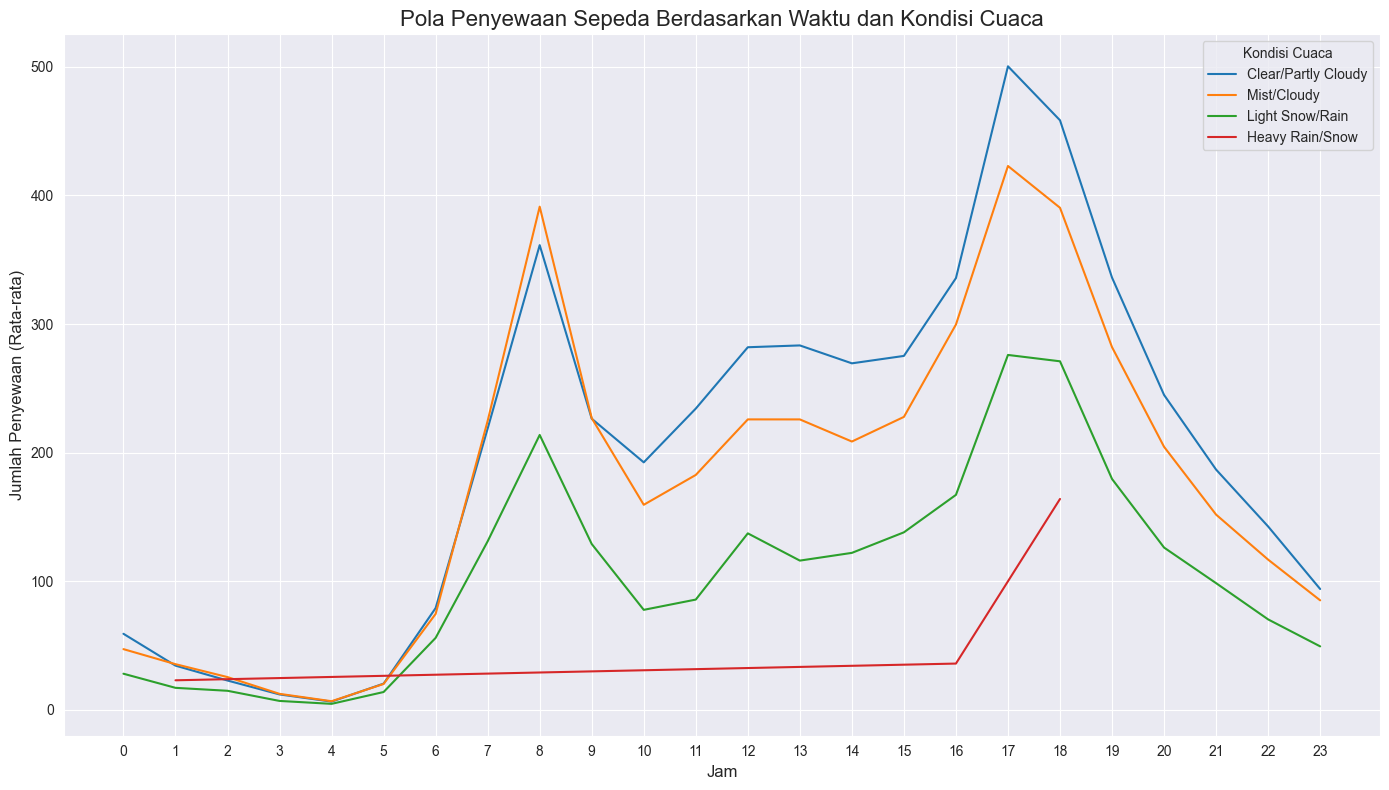

In [58]:
# Plot: Pola penyewaan berdasarkan waktu dan kondisi cuaca
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=hourly_weather,
    x='hr', y='cnt', hue='weathersit', palette='tab10'
)

# Menambahkan judul dan label
plt.title("Pola Penyewaan Sepeda Berdasarkan Waktu dan Kondisi Cuaca", fontsize=16)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Penyewaan (Rata-rata)", fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title="Kondisi Cuaca", fontsize=10)
plt.grid(True)
plt.tight_layout()

# Tampilkan plot
plt.show()

Berdasarkan data rata-rata penyewaan sepeda (`cnt`) yang dibagi berdasarkan waktu (`hr`) dan kondisi cuaca (`weathersit`), berikut adalah beberapa insight:

---

### 1. **Pola Penyewaan Berdasarkan Waktu (`hr`)**
- **Jam Sibuk Pagi dan Sore (07:00 - 09:00 & 17:00 - 18:00)**
  - Penyewaan tertinggi terjadi pada jam **07:00 hingga 09:00** dan **17:00**.
  - Hal ini menunjukkan bahwa penyewaan sepeda cenderung digunakan untuk **transportasi kerja/sekolah** pada pagi hari dan pulang pada sore hari.

- **Jam Siang (12:00 - 16:00)**
  - Penyewaan tetap tinggi tetapi sedikit menurun dibandingkan jam sibuk.

- **Jam Malam (21:00 - 06:00)**
  - Penyewaan turun drastis pada malam hingga dini hari, menunjukkan bahwa sepeda jarang digunakan pada waktu ini.

---

### 2. **Pola Penyewaan Berdasarkan Kondisi Cuaca (`weathersit`)**
- **Clear/Partly Cloudy (Cuaca Cerah atau Berawan Sebagian)**
  - Rata-rata penyewaan tertinggi terjadi pada kondisi ini.
  - Ini menunjukkan bahwa pengguna lebih suka menggunakan sepeda ketika cuaca mendukung, baik untuk transportasi maupun rekreasi.

- **Mist/Cloudy (Berkabut atau Berawan)**
  - Penyewaan sedikit lebih rendah dibandingkan kondisi cerah, tetapi tetap signifikan. Ini mungkin menunjukkan bahwa pengguna masih bersedia menyewa sepeda saat kondisi cuaca sedang.

- **Light Snow/Rain (Salju/Rintik Hujan Ringan)**
  - Penyewaan menurun signifikan dibandingkan kondisi cerah atau berawan. Cuaca ini kurang mendukung untuk aktivitas bersepeda.

- **Heavy Rain/Snow (Hujan/Salju Lebat)**
  - Penyewaan sangat jarang pada kondisi ini. Ini mencerminkan bahwa cuaca buruk menghambat aktivitas bersepeda.

---

### 3. **Perbandingan Waktu dan Cuaca**
- **Jam Sibuk Mendukung Penyewaan Tertinggi, Terlepas dari Cuaca**
  - Penyewaan pada jam sibuk pagi dan sore tetap tinggi meskipun cuaca sedang berkabut atau rintik hujan ringan.
  - Hal ini menunjukkan bahwa kebutuhan transportasi mendesak lebih dominan dibandingkan pengaruh cuaca.

- **Cuaca Baik Mendukung Penyewaan Sepanjang Hari**
  - Pada kondisi cerah, penyewaan tinggi tidak hanya pada jam sibuk tetapi juga pada jam siang dan sore.

---

## Conclusion

- Faktor-faktor tersebut menunjukkan bahwa **cuaca**, **waktu**, dan **konteks aktivitas** memainkan peran penting dalam menentukan jumlah penyewaan sepeda. **Feeling temperature (`atemp`)** adalah faktor utama karena kenyamanan fisik pengguna sangat penting dalam memilih moda transportasi sepeda. **Hari kerja (`workingday`)** dan **jam sibuk (`hr_17`)** mengindikasikan pola penggunaan rutin, sementara **tahun (`yr`)** mencerminkan tren jangka panjang. **Kelembapan (`hum`)** menunjukkan dampak cuaca pada kenyamanan.

- Sharing sepeda sangat dipengaruhi oleh **kebutuhan transportasi pada jam tertentu** dan **kondisi cuaca yang mendukung aktivitas luar ruangan**. Untuk memaksimalkan penggunaan, layanan harus menyesuaikan strategi operasionalnya berdasarkan waktu dan cuaca, seperti meningkatkan ketersediaan sepeda pada jam sibuk dan mempromosikan penggunaan sepeda saat cuaca cerah.